Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0589 - val_loss: 0.0410
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0369 - val_loss: 0.0335
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0318 - val_loss: 0.0298
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - val_loss: 0.0270
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


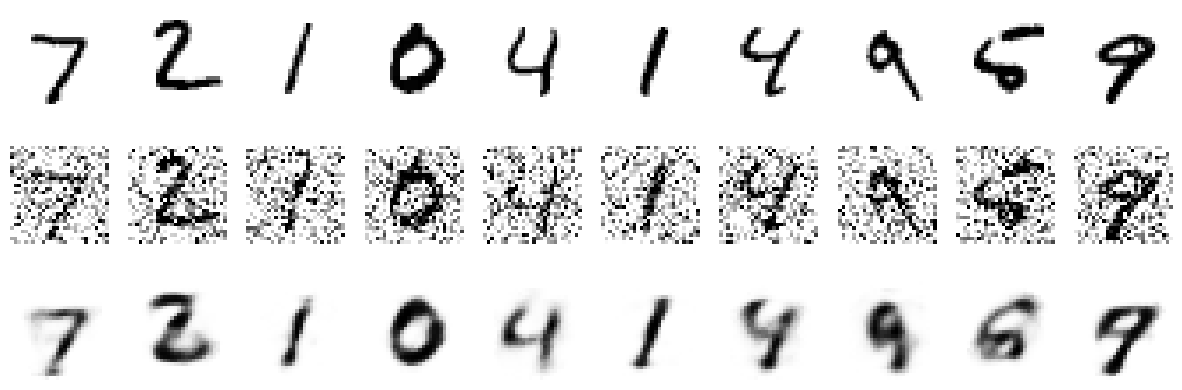

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist

# Load MNIST dataset and normalize
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add noise and clip
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# Autoencoder model
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(encoded)
decoded = Reshape((28, 28, 1))(Dense(28 * 28, activation='sigmoid')(x))

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=128, validation_data=(x_test_noisy, x_test))

# Denoise images
denoised = autoencoder.predict(x_test_noisy)

# Display images
def plot_images(original, noisy, denoised, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        for idx, img in enumerate([original, noisy, denoised]):
            plt.subplot(3, n, i + 1 + idx * n)
            plt.imshow(img[i].reshape(28, 28), cmap='binary')
            plt.axis('off')
    plt.show()

plot_images(x_test, x_test_noisy, denoised)
